In [214]:
import numpy as np
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import pylab as pl
from sklearn import linear_model

In [215]:
filepath= 'file:///C:/Users/NEW%20USER/Downloads/LOG%20REG%20FOR%20CATFISH%20(Autosaved).xlsx'
df= pd.read_excel(filepath, sheet_name= 'Sheet2', skiprows= 1)

In [216]:
df.describe(include= 'all')


,Unnamed: 0,DATA SOURCE,protein feedstuff,percentage_inclusion,Culture_period,Fish_weight,moisture,Crude_fibre,NFE,Unnamed: 9,protein,Fat,Ash Content,WG,FCR,SGR,PER
count,0.0,4,12,12.000000,12.000000,12.000000,12.000000,10.000000,7.000000,0.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
unique,NaN,4,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,chukwuemeka,fish meal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,20.811667,10.166667,8.683333,8.898333,4.811000,25.850000,NaN,39.780833,7.116667,25.621667,312.917500,1.535000,2.556667,1.306667
std,NaN,NaN,NaN,13.204714,3.010084,6.623455,1.873935,0.783205,2.208303,NaN,2.521837,2.623878,28.799747,281.339198,1.436653,2.721582,0.970439
min,NaN,NaN,NaN,9.860000,4.000000,2.850000,4.780000,3.740000,22.630000,NaN,35.960000,4.360000,8.000000,122.600000,0.620000,0.690000,0.460000
25%,NaN,NaN,NaN,13.000000,10.000000,5.000000,9.140000,4.125000,24.450000,NaN,38.042500,4.925000,12.172500,150.700000,0.680000,0.957500,0.542500
50%,NaN,NaN,NaN,13.465000,12.000000,5.000000,9.825000,5.045000,25.470000,NaN,40.010000,6.060000,15.830000,220.935000,1.155000,1.090000,0.570000
75%,NaN,NaN,NaN,25.000000,12.000000,10.000000,9.892500,5.525000,27.750000,NaN,40.745000,9.035000,16.070000,272.525000,1.265000,2.552500,2.257500


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            0 non-null      float64
 1   DATA SOURCE           4 non-null      object 
 2   protein feedstuff     12 non-null     object 
 3   percentage_inclusion  12 non-null     float64
 4   Culture_period        12 non-null     int64  
 5   Fish_weight           12 non-null     float64
 6   moisture              12 non-null     float64
 7   Crude_fibre           10 non-null     float64
 8   NFE                   7 non-null      float64
 9   Unnamed: 9            0 non-null      float64
 10  protein               12 non-null     float64
 11  Fat                   12 non-null     float64
 12  Ash Content           12 non-null     float64
 13  WG                    12 non-null     float64
 14  FCR                   12 non-null     float64
 15  SGR                   12 

In [218]:
df.corr()

,Unnamed: 0,percentage_inclusion,Culture_period,Fish_weight,moisture,Crude_fibre,NFE,Unnamed: 9,protein,Fat,Ash Content,WG,FCR,SGR,PER
Unnamed: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
percentage_inclusion,NaN,1.000000,-0.455659,0.168444,-0.472363,-0.679643,-0.371293,NaN,0.384604,0.381629,0.409341,0.600550,0.324120,0.487845,0.289586
Culture_period,NaN,-0.455659,1.000000,0.389557,0.955447,0.071367,NaN,NaN,-0.043613,-0.897954,-0.926296,-0.962243,0.129707,-0.996885,-0.633426
Fish_weight,NaN,0.168444,0.389557,1.000000,0.318306,-0.781319,-0.347324,NaN,0.819206,-0.382026,-0.444672,-0.272261,0.909539,-0.415082,-0.150043
moisture,NaN,-0.472363,0.955447,0.318306,1.000000,0.445696,0.055056,NaN,-0.062533,-0.760947,-0.971494,-0.983213,0.015607,-0.963291,-0.422485
Crude_fibre,NaN,-0.679643,0.071367,-0.781319,0.445696,1.000000,0.025792,NaN,-0.684152,0.114167,0.304301,-0.485854,-0.741280,0.015694,-0.057322
NFE,NaN,-0.371293,NaN,-0.347324,0.055056,0.025792,1.000000,NaN,-0.671174,-0.646539,0.249806,-0.333355,-0.368822,0.361076,-0.060136
Unnamed: 9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
protein,NaN,0.384604,-0.043613,0.819206,-0.062533,-0.684152,-0.671174,NaN,1.000000,0.103002,-0.073082,0.134856,0.821461,0.013027,0.192039
Fat,NaN,0.381629,-0.897954,-0.382026,-0.760947,0.114167,-0.646539,NaN,0.103002,1.000000,0.694794,0.800318,-0.261547,0.884321,0.863797


In [219]:
df.columns

Index(['Unnamed: 0', 'DATA SOURCE', 'protein feedstuff',
       'percentage_inclusion', 'Culture_period', 'Fish_weight', 'moisture',
       'Crude_fibre', 'NFE', 'Unnamed: 9', 'protein', 'Fat', 'Ash Content',
       'WG', 'FCR', 'SGR', 'PER'],
      dtype='object')

## Using multiple Linear Regression to observe trends in the randomly selected data

In [220]:
df

,Unnamed: 0,DATA SOURCE,protein feedstuff,percentage_inclusion,Culture_period,Fish_weight,moisture,Crude_fibre,NFE,Unnamed: 9,protein,Fat,Ash Content,WG,FCR,SGR,PER
0,NaN,lim leong,fish meal,56.65,4,2.85,4.78,NaN,NaN,NaN,39.82,11.45,86.55,999.62,1.24,8.56,2.16
1,NaN,NaN,feather meal,9.86,4,2.85,5.12,NaN,NaN,NaN,39.51,11.20,87.40,788.46,1.34,7.79,2.04
2,NaN,adetarami,fish meal,31.73,12,21.70,9.90,3.74,23.98,NaN,44.20,4.76,13.27,193.26,5.07,0.69,0.46
3,NaN,NaN,maggot,22.77,12,21.80,8.90,3.76,25.47,NaN,43.50,4.60,12.70,298.16,3.96,0.96,0.58
4,NaN,chukwuemeka,fish meal,25.00,10,10.00,9.55,4.10,NaN,NaN,40.76,9.20,10.59,248.61,1.15,2.53,2.55
5,NaN,NaN,maggot,12.50,10,10.00,9.22,4.87,NaN,NaN,40.59,8.98,9.10,259.02,1.17,2.55,2.60
6,NaN,NaN,maggot,25.00,10,10.00,9.87,5.22,NaN,NaN,40.74,8.51,8.00,263.98,1.16,2.56,2.60
7,NaN,Falaye et al,aqualis/fishmeal CT,13.63,12,5.00,9.96,4.20,28.45,NaN,37.42,4.36,15.78,127.50,0.65,0.97,0.52
8,NaN,NaN,T1,13.30,12,5.00,9.78,5.53,28.20,NaN,35.96,4.98,15.88,122.60,0.68,0.95,0.50
9,NaN,NaN,T2,13.30,12,5.00,9.89,5.51,27.30,NaN,36.42,5.24,16.02,150.90,0.70,1.09,0.56


In [221]:
## drop columns with string values
##(df.dropna(subset= ['Unnamed: 0'], axis= 0, inplace= True) df.dropna(subset= ['DATA SOURCE'], axis= 0, inplace= True) df.dropna(subset= ['protein feedstuff'], axis= 0, inplace= True)df.dropna(subset= ['Unnamed: 9'], axis= 0, inplace= True))

In [94]:
df= df[['percentage_inclusion', 'Culture_period', 'Fish_weight', 'moisture', 'Crude_fibre', 'NFE', 'protein', 'Fat', 'Ash Content', 'WG', 'FCR', 'SGR', 'PER']]

In [222]:
mean= df['Crude_fibre'].mean()
df['Crude_fibre']= df['Crude_fibre'].replace(np.nan, mean)

In [223]:
mean= df['NFE'].mean()
df['NFE']= df['NFE'].replace(np.nan, mean)

In [224]:
df.head()

,Unnamed: 0,DATA SOURCE,protein feedstuff,percentage_inclusion,Culture_period,Fish_weight,moisture,Crude_fibre,NFE,Unnamed: 9,protein,Fat,Ash Content,WG,FCR,SGR,PER
0,NaN,lim leong,fish meal,56.65,4,2.85,4.78,4.811,25.85,NaN,39.82,11.45,86.55,999.62,1.24,8.56,2.16
1,NaN,NaN,feather meal,9.86,4,2.85,5.12,4.811,25.85,NaN,39.51,11.20,87.40,788.46,1.34,7.79,2.04
2,NaN,adetarami,fish meal,31.73,12,21.70,9.90,3.740,23.98,NaN,44.20,4.76,13.27,193.26,5.07,0.69,0.46
3,NaN,NaN,maggot,22.77,12,21.80,8.90,3.760,25.47,NaN,43.50,4.60,12.70,298.16,3.96,0.96,0.58
4,NaN,chukwuemeka,fish meal,25.00,10,10.00,9.55,4.100,25.85,NaN,40.76,9.20,10.59,248.61,1.15,2.53,2.55


In [225]:
df.corr()

,Unnamed: 0,percentage_inclusion,Culture_period,Fish_weight,moisture,Crude_fibre,NFE,Unnamed: 9,protein,Fat,Ash Content,WG,FCR,SGR,PER
Unnamed: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
percentage_inclusion,NaN,1.000000,-4.556589e-01,0.168444,-0.472363,-0.329841,-1.517947e-01,NaN,0.384604,0.381629,0.409341,0.600550,0.324120,0.487845,0.289586
Culture_period,NaN,-0.455659,1.000000e+00,0.389557,0.955447,0.020719,4.769678e-16,NaN,-0.043613,-0.897954,-0.926296,-0.962243,0.129707,-0.996885,-0.633426
Fish_weight,NaN,0.168444,3.895574e-01,1.000000,0.318306,-0.712145,-3.165358e-01,NaN,0.819206,-0.382026,-0.444672,-0.272261,0.909539,-0.415082,-0.150043
moisture,NaN,-0.472363,9.554473e-01,0.318306,1.000000,0.077094,8.209637e-03,NaN,-0.062533,-0.760947,-0.971494,-0.983213,0.015607,-0.963291,-0.422485
Crude_fibre,NaN,-0.329841,2.071880e-02,-0.712145,0.077094,1.000000,2.413929e-02,NaN,-0.683759,0.075587,0.030082,-0.101350,-0.738843,0.004049,-0.052957
NFE,NaN,-0.151795,4.769678e-16,-0.316536,0.008210,0.024139,1.000000e+00,NaN,-0.654107,-0.138830,0.009430,-0.053076,-0.361274,0.013095,-0.001918
Unnamed: 9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
protein,NaN,0.384604,-4.361259e-02,0.819206,-0.062533,-0.683759,-6.541069e-01,NaN,1.000000,0.103002,-0.073082,0.134856,0.821461,0.013027,0.192039
Fat,NaN,0.381629,-8.979537e-01,-0.382026,-0.760947,0.075587,-1.388305e-01,NaN,0.103002,1.000000,0.694794,0.800318,-0.261547,0.884321,0.863797


(0, 54.99406835333801)

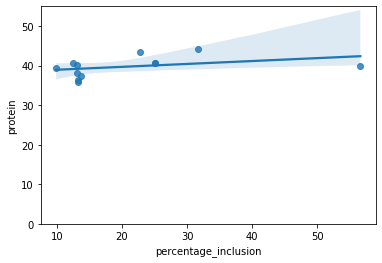

In [226]:
sns.regplot(x= 'percentage_inclusion', y= 'protein', data= df)
plt.ylim(0)

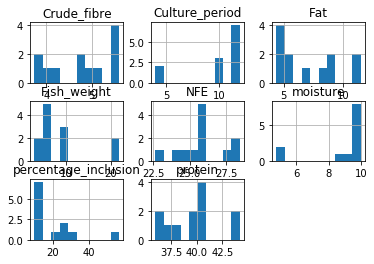

In [227]:
viz= df[['percentage_inclusion', 'Fish_weight','moisture', 'Crude_fibre', 'NFE', 'protein', 'Fat', 'Culture_period']]
viz.hist()
plt.show()

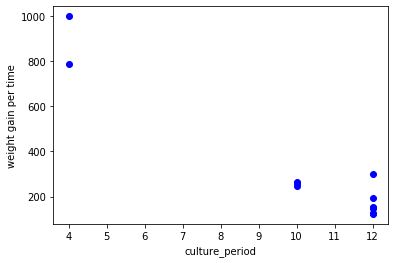

In [228]:
plt.scatter(df.Culture_period, df.WG, color= 'blue')
plt.xlabel("culture_period")
plt.ylabel("weight gain per time")
plt.show()

#  WEIGTH GAINED VS RECORDED NUTRITIONAL PARAMETERS

In [99]:
msk= np.random.rand(len(df))<0.8
train= df[msk]
test= df[~msk]

In [100]:
df.columns
from sklearn import linear_model

In [101]:
regr= linear_model.LinearRegression()
x= np.asanyarray(train[['percentage_inclusion','Fish_weight', 'Ash Content','moisture', 'Crude_fibre', 'NFE', 'protein', 'Fat', 'Culture_period']])
y= np.asanyarray(train[['WG']])
regr.fit(x,y)
print('Regression coefficients for Weight gained VS Nutritional parameters: ', regr.coef_)

Regression coefficients for Weight gained VS Nutritional parameters:  [[-14.90890511  -1.55364785  10.52947878 -20.04086377  50.5005928
   -0.15578536  59.83183099   9.14434908 -52.68589171]]


In [102]:
y_hat=regr.predict(test[['percentage_inclusion','Fish_weight', 'Ash Content','moisture', 'Crude_fibre', 'NFE', 'protein', 'Fat', 'Culture_period']])
x= np.asanyarray(test[['percentage_inclusion','Fish_weight', 'Ash Content','moisture', 'Crude_fibre', 'NFE', 'protein', 'Fat', 'Culture_period']])
y= np.asanyarray(test[['WG']])
print('Residual sum of Squares: %.2f'%np.mean((y_hat- y)** 2))
print('Variance Score: %.2f'%regr.score(x, y))

Residual sum of Squares: 226436.64
Variance Score: -2.25


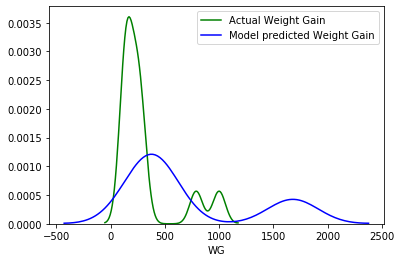

In [103]:
ax0= sns.distplot(df['WG'], hist= False, color= 'g', label= 'Actual Weight Gain')
sns.distplot(y_hat, hist= False, color= 'b', label= 'Model predicted Weight Gain', ax= ax0)

In [212]:
df1= df[['percentage_inclusion','Fish_weight','moisture', 'Ash Content', 'Crude_fibre', 'NFE', 'protein', 'Fat', 'Culture_period']]

# MULTIPLE REGRESSION FOR SGR VS NUTRITIONAL PARAMETERS

In [104]:
x= np.asanyarray(train[['percentage_inclusion','Fish_weight','moisture', 'Ash Content', 'Crude_fibre', 'NFE', 'protein', 'Fat', 'Culture_period']])
y= np.asanyarray(train[['SGR']])
regr.fit(x,y)
print('Regression coefficient for SGR vs Nutritional Parameters: ', regr.coef_)

Regression coefficient for SGR vs Nutritional Parameters:  [[-0.03732547 -0.09767671 -0.15467068  0.04215604  0.2803236   0.06021096
   0.36179676  0.17108368 -0.38814189]]


In [105]:
y_hat= regr.predict(test[['percentage_inclusion','Fish_weight', 'Ash Content','moisture', 'Crude_fibre', 'NFE', 'protein', 'Fat', 'Culture_period']])
x= np.asanyarray(test[['percentage_inclusion','Fish_weight', 'Ash Content','moisture', 'Crude_fibre', 'NFE', 'protein', 'Fat', 'Culture_period']])
y= np.asanyarray(test[['SGR']])
print('Residual sum of squares: %.2f'%np.mean((y_hat)**2))
print('Variance score for SGR: %.2f'%regr.score(x, y))

Residual sum of squares: 12.05
Variance score for SGR: -5.21


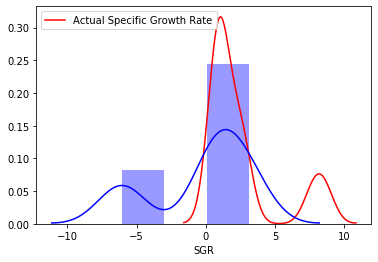

In [107]:
## Using seaborn to check the appropriateness on a distribution plot
ax1= sns.distplot(df['SGR'], hist= False, color= 'r', label= 'Actual Specific Growth Rate')
ax1= sns.distplot(y_hat, hist= 'false', color= 'b', label= 'Model prediction', ax= ax1)

#  MULTIPLE LINEAR REGRESSION MODEL AND DISTRIBUTION PLOT FOR FEED CONVERSION RATIO(FCR) VS NUTRITIONAL FEED COMPONENTS

In [108]:
x= np.asanyarray(train[['percentage_inclusion','Fish_weight', 'Ash Content','moisture', 'Crude_fibre', 'NFE', 'protein', 'Fat', 'Culture_period']])
y= np.asanyarray(train[['FCR']])
regr.fit(x,y)
print('Regression coefficient for FCR vs Nutrition', regr.coef_)

Regression coefficient for FCR vs Nutrition [[ 0.10526429  0.19286711  0.00789994  0.11847951 -0.10741592 -0.15065779
  -0.19748467 -0.15783122  0.27528163]]


In [109]:
y_hat= regr.predict(test[['percentage_inclusion','Fish_weight', 'Ash Content','moisture', 'Crude_fibre', 'NFE', 'protein', 'Fat', 'Culture_period']])
x= np.asanyarray(test[['percentage_inclusion','Fish_weight', 'Ash Content','moisture', 'Crude_fibre', 'NFE', 'protein', 'Fat', 'Culture_period']])
y= np.asanyarray(test[['FCR']])
print('Residual sum of squares for FCR vs Nutritional Factors is : %.2f'%np.mean((y_hat)**2))
print('Variance score for FCR vs Nutritional factors is : %.2f'%regr.score(x, y))

Residual sum of squares for FCR vs Nutritional Factors is : 3.28
Variance score for FCR vs Nutritional factors is : -66.51


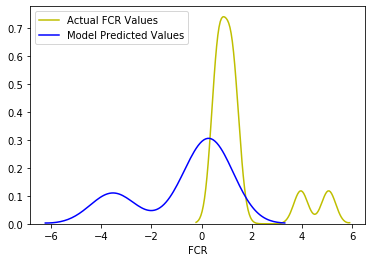

In [110]:
ax2= sns.distplot(df['FCR'], hist= False, color= 'y', label= 'Actual FCR Values')
ax2= sns.distplot(y_hat, hist= False, color= 'b', label= 'Model Predicted Values', ax= ax2)

#  PROTEIN EFFICIENCY RATIO

In [112]:
x= np.asanyarray(train[['percentage_inclusion','Fish_weight','moisture', 'Ash Content', 'Crude_fibre', 'NFE', 'protein', 'Fat', 'Culture_period']])
y= np.asanyarray(train[['PER']])
regr.fit(x,y)
print('Regression coefficient for PER vs Nutrition', regr.coef_)

Regression coefficient for PER vs Nutrition [[-0.00365417 -0.07475169 -0.12883157 -0.04607632  0.11843641  0.08418672
   0.21699545  0.22669627 -0.28105186]]


In [113]:
y_hat= regr.predict(test[['percentage_inclusion','Fish_weight','moisture', 'Ash Content', 'Crude_fibre', 'NFE', 'protein', 'Fat', 'Culture_period']])
x= np.asanyarray(test[['percentage_inclusion','Fish_weight','moisture', 'Ash Content', 'Crude_fibre', 'NFE', 'protein', 'Fat', 'Culture_period']])
y= np.asanyarray(test[['PER']])
print('Residual sum of squares for PER vs Nutritional Factors is : %.2f'%np.mean((y_hat)**2))
print('Variance score for PER vs Nutritional factors is : %.2f'%regr.score(x, y))

Residual sum of squares for PER vs Nutritional Factors is : 3.56
Variance score for PER vs Nutritional factors is : 0.80


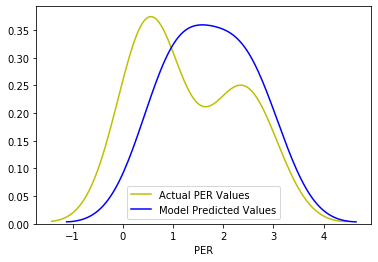

In [114]:
ax3= sns.distplot(df['PER'], hist= False, color= 'y', label= 'Actual PER Values')
ax3= sns.distplot(y_hat, hist= False, color= 'b', label= 'Model Predicted Values', ax= ax3)

# MODEL PREDICTION VISUALIZATIONS FOR PER

In [229]:
# FOR PER
y_data= df['PER']
x_data= df.drop('PER', axis = 1)

In [230]:
## Randomly split the data into train test split
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 4
number of training samples: 8


In [231]:
from sklearn.linear_model import LinearRegression

In [232]:
lre= LinearRegression()
lre.fit(x_train[['protein']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [233]:
lre.score(x_test[['protein']], y_test)

-4.691046368778455

In [234]:
lre.score(x_train[['protein']], y_train)

0.5891151926883638

In [235]:
df.columns

Index(['Unnamed: 0', 'DATA SOURCE', 'protein feedstuff',
       'percentage_inclusion', 'Culture_period', 'Fish_weight', 'moisture',
       'Crude_fibre', 'NFE', 'Unnamed: 9', 'protein', 'Fat', 'Ash Content',
       'WG', 'FCR', 'SGR', 'PER'],
      dtype='object')

# 

In [236]:
# MULTIPLE LINEAR REGRESSION FROM HERE
lr= LinearRegression()
lr.fit(x_train[['percentage_inclusion','Fish_weight','moisture', 'Ash Content', 'Crude_fibre', 'NFE', 'protein', 'Fat', 'Culture_period']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [237]:
x_train= df[['percentage_inclusion','Fish_weight','moisture', 'Ash Content', 'Crude_fibre', 'NFE', 'protein', 'Fat', 'Culture_period']]

In [238]:
## prediction using training data
yhat_train= lr.predict(x_train)
yhat_train

array([2.16      , 2.04      , 5.53290252, 5.29877986, 2.91490224])

In [239]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('NUTRITIONAL COMPONENTS')
    plt.ylabel('PREDICTIONS')

    plt.show()
    plt.close()

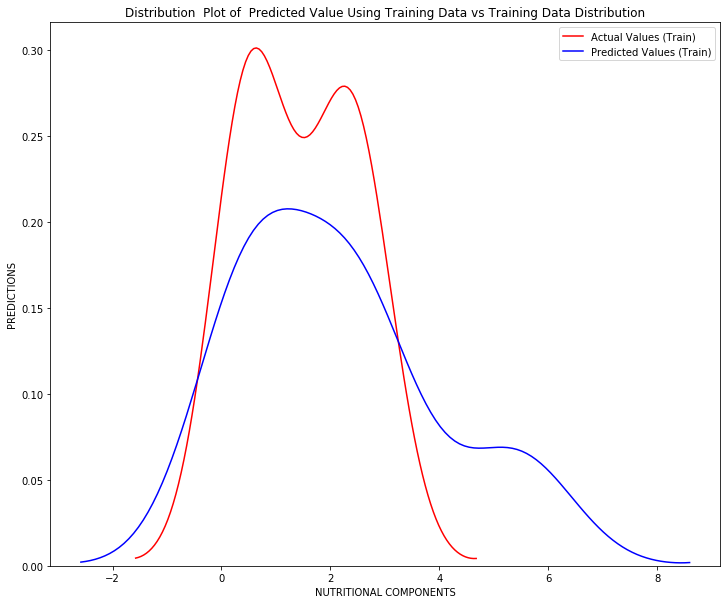

In [240]:
## EVALUATING THE NEWLY CREATED MODEL
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

## MODEL PREDICTION VISUALIZATION FOR SGR

In [241]:
y_data= df['SGR']
x_data= df.drop('SGR', axis = 1)

In [242]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 4
number of training samples: 8


In [243]:
lr= LinearRegression()
lr.fit(x_train[['percentage_inclusion','Fish_weight','moisture', 'Ash Content', 'Crude_fibre', 'NFE', 'protein', 'Fat', 'Culture_period']], y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [244]:
x_train= df[['percentage_inclusion','Fish_weight','moisture', 'Ash Content', 'Crude_fibre', 'NFE', 'protein', 'Fat', 'Culture_period']]


In [245]:
yhat_train= lr.predict(x_train)
yhat_train

array([8.56      , 7.79      , 6.55431258, 5.913438  , 3.4983249 ,
       2.55      , 2.56      , 0.97      , 0.95      , 1.09      ,
       0.88751811, 0.94      ])

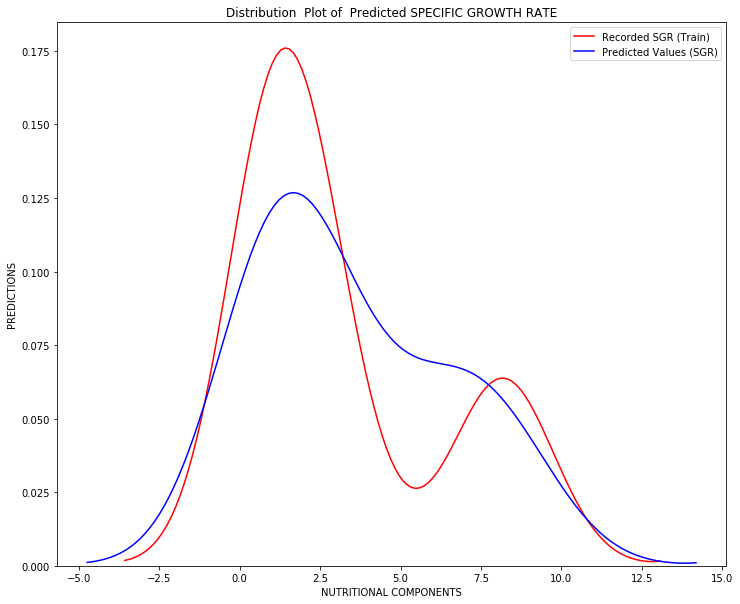

In [246]:
Title = 'Distribution  Plot of  Predicted SPECIFIC GROWTH RATE'
DistributionPlot(y_train, yhat_train, "Recorded SGR (Train)", "Predicted Values (SGR)", Title)

# MODEL PREDICTION VISUALIZATION FOR WG

In [266]:
y_data= df['WG']
x_data= df.drop('WG', axis = 1)
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 4
number of training samples: 8


In [267]:
lr= LinearRegression()
lr.fit(x_train[['percentage_inclusion','Fish_weight','moisture', 'Ash Content', 'Crude_fibre', 'NFE', 'protein', 'Fat', 'Culture_period']], y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [268]:
x_train= df[['percentage_inclusion','Fish_weight','moisture', 'Ash Content', 'Crude_fibre', 'NFE', 'protein', 'Fat', 'Culture_period']]


In [269]:
yhat_train= lr.predict(x_train)
yhat_train

array([999.62      , 788.46      , 633.81812712, 523.9567306 ,
       429.74096757, 259.02      , 263.98      , 127.5       ,
       122.6       , 150.9       , 130.50136411, 152.8       ])

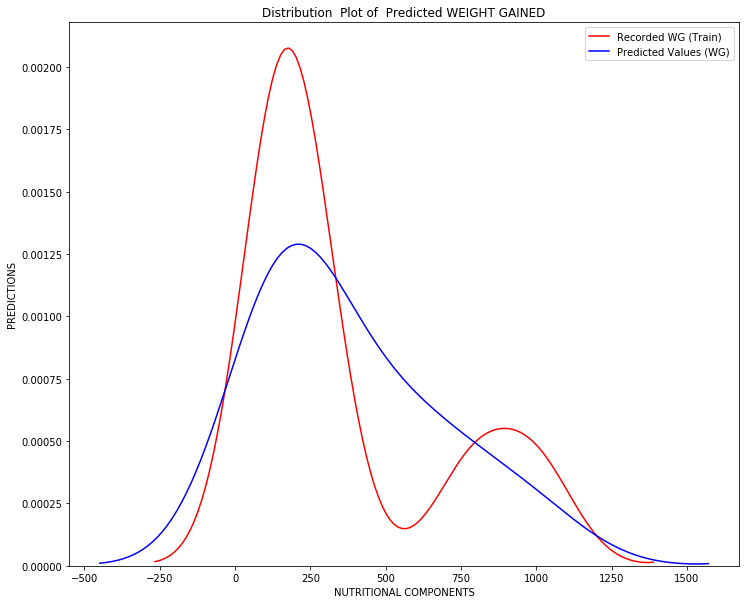

In [270]:
Title = 'Distribution  Plot of  Predicted WEIGHT GAINED'
DistributionPlot(y_train, yhat_train, "Recorded WG (Train)", "Predicted Values (WG)", Title)

#  MODEL PREDICTION FOR FEED CONVERSION RATIO

In [271]:
y_data= df['FCR']
x_data= df.drop(['FCR'], axis = 1)
x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size= 0.3, random_state= 1)
print('number of test sample: ', x_test.shape[0])
print('number of train sample', x_train.shape[0])

number of test sample:  4
number of train sample 8


In [272]:
lr.fit(x_train[['percentage_inclusion','Fish_weight','moisture', 'Ash Content', 'Crude_fibre', 'NFE', 'protein', 'Fat', 'Culture_period']], y_train)
x_train= df[['percentage_inclusion','Fish_weight','moisture', 'Ash Content', 'Crude_fibre', 'NFE', 'protein', 'Fat', 'Culture_period']]


In [273]:
yhat_train= lr.predict(x_train)
yhat_train

array([1.24      , 1.34      , 2.14534596, 2.04668605, 1.2645656 ,
       1.17      , 1.16      , 0.65      , 0.68      , 0.7       ,
       0.64366227, 0.62      ])

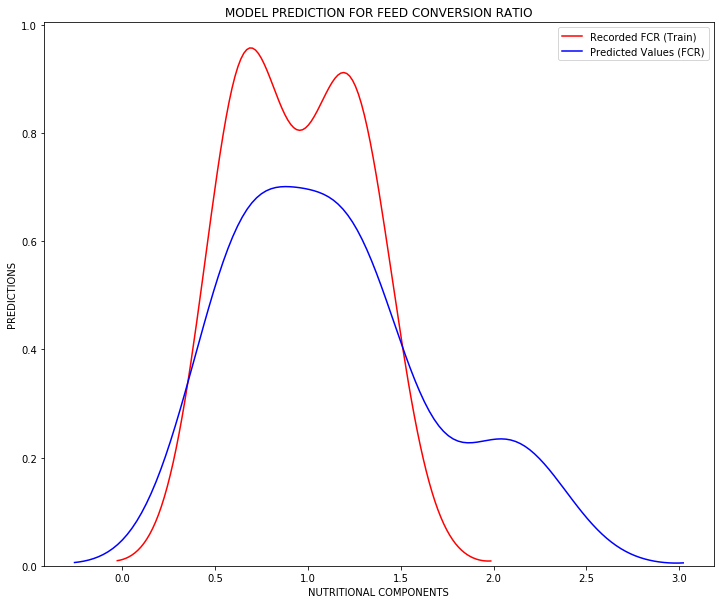

In [274]:
Title = 'MODEL PREDICTION FOR FEED CONVERSION RATIO'
DistributionPlot(y_train, yhat_train, "Recorded FCR (Train)", "Predicted Values (FCR)", Title)

In [276]:
print('R2 value =',lr.score_)
print('Regression coefficient', lr.coef_)

Regression coefficient [-0.00087724  0.11174702  0.10874878  0.01111408 -0.07316067 -0.03162679
 -0.07566898  0.04370027 -0.05987659]


In [265]:
x_data

,Unnamed: 0,DATA SOURCE,protein feedstuff,percentage_inclusion,Culture_period,Fish_weight,moisture,Crude_fibre,NFE,Unnamed: 9,protein,Fat,Ash Content,WG,SGR,PER
0,NaN,lim leong,fish meal,56.65,4,2.85,4.78,4.811,25.85,NaN,39.82,11.45,86.55,999.62,8.56,2.16
1,NaN,NaN,feather meal,9.86,4,2.85,5.12,4.811,25.85,NaN,39.51,11.20,87.40,788.46,7.79,2.04
2,NaN,adetarami,fish meal,31.73,12,21.70,9.90,3.740,23.98,NaN,44.20,4.76,13.27,193.26,0.69,0.46
3,NaN,NaN,maggot,22.77,12,21.80,8.90,3.760,25.47,NaN,43.50,4.60,12.70,298.16,0.96,0.58
4,NaN,chukwuemeka,fish meal,25.00,10,10.00,9.55,4.100,25.85,NaN,40.76,9.20,10.59,248.61,2.53,2.55
5,NaN,NaN,maggot,12.50,10,10.00,9.22,4.870,25.85,NaN,40.59,8.98,9.10,259.02,2.55,2.60
6,NaN,NaN,maggot,25.00,10,10.00,9.87,5.220,25.85,NaN,40.74,8.51,8.00,263.98,2.56,2.60
7,NaN,Falaye et al,aqualis/fishmeal CT,13.63,12,5.00,9.96,4.200,28.45,NaN,37.42,4.36,15.78,127.50,0.97,0.52
8,NaN,NaN,T1,13.30,12,5.00,9.78,5.530,28.20,NaN,35.96,4.98,15.88,122.60,0.95,0.50
9,NaN,NaN,T2,13.30,12,5.00,9.89,5.510,27.30,NaN,36.42,5.24,16.02,150.90,1.09,0.56


# OVERFITTING

In [277]:
from sklearn.preprocessing import PolynomialFeatures

In [278]:
## USING 55% OF DATA FOR TESTING $ TRAINING
x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size= 0.45, random_state= 0)

In [279]:
## 5 degree polynomial transformation on the data
pr= PolynomialFeatures(degree= 5)
x_train_pr= pr.fit_transform(x_train[['SGR']])
x_test_pr=pr.fit_transform(x_test[['SGR']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [293]:
poly= LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [302]:
yhat=poly.predict(x_test_pr)
yhat
## compare prediction values with those generated from MLR model

array([-252.84925365,   11.87899112,  477.46888879,    0.70000002,
        211.0483782 ,    7.70810096])

In [306]:
yhat= pd.DataFrame(['yhat'])


,0
0,yhat


In [282]:
print('predicted values: ', yhat[0:4])
print('true values: ', y_test[0:4].values)

predicted values:  [-21.48332312  12.31859866  45.18320588   0.69999998]
true values:  [1.16 0.62 1.15 0.68]


In [283]:
## defining the pollyplot function
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('SGR')
    plt.legend()

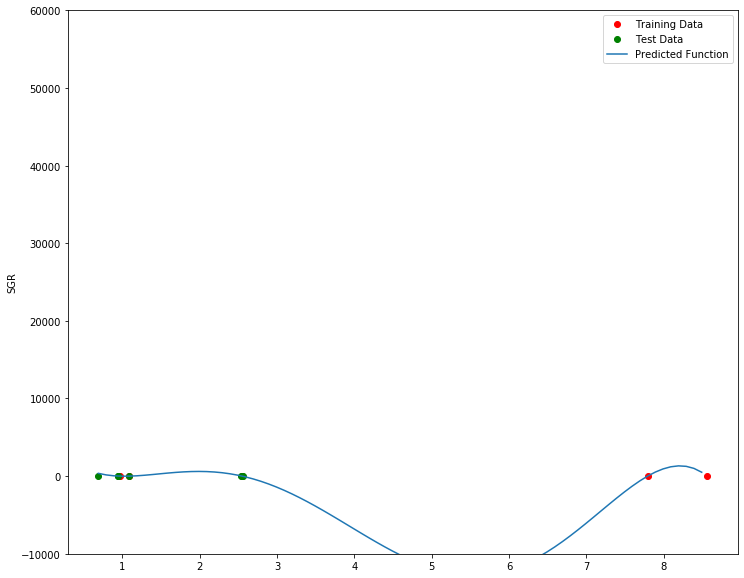

In [284]:
PollyPlot(x_train[['SGR']], x_test[['SGR']], y_train, y_test, poly, pr)

In [285]:
poly.score(x_train_pr, y_train)

0.9999999999999992

In [286]:
poly.score(x_test_pr, y_test)

-8531.691745847196

Text(3, 0.75, 'Maximum R^2 ')

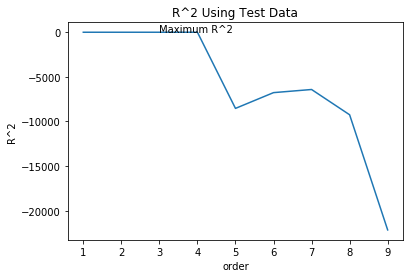

In [287]:
Rsqu_test = []

order = range(1, 10)
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['SGR']])
    
    x_test_pr = pr.fit_transform(x_test[['SGR']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')  